In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv('Loan_train.csv')
test_data=pd.read_csv('Loan_test.csv')

In [3]:
train_data.shape

(614, 13)

In [4]:
test_data.shape

(367, 12)

In [5]:
train_dataset_original=train_data.copy()  #backup
test_dataset_original=test_data.copy()

In [6]:
train_data['type']='train'
test_data['type']='test'

In [7]:
combined_dataset=pd.concat([train_data,test_data])

In [8]:
#understand the data
combined_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,type
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [9]:
combined_dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,type
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN,test
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN,test
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN,test
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN,test
366,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN,test


In [10]:
combined_dataset.shape

(981, 14)

In [11]:
combined_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'type'],
      dtype='object')

In [12]:
combined_dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
type                  object
dtype: object

# Missing value handling

In [13]:
combined_dataset.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
type                   0
dtype: int64

In [14]:
#missing values in Gender,Married,Dependents, self_employed,Loanammount,Loan_Amount_Term,Credit_History and Loan_Status 
#so we need to handle these missing values.
missing_cols=combined_dataset.isna().sum()[combined_dataset.isna().sum()>0].index

In [15]:
#Checking for missing value
#percentage of misisng
missing_val_percentage=combined_dataset.isna().sum()[combined_dataset.isna().sum()>0]*100/combined_dataset.shape[0]
print("Percentage of Missing\n")
print(missing_val_percentage)

Percentage of Missing

Gender               2.446483
Married              0.305810
Dependents           2.548420
Self_Employed        5.606524
LoanAmount           2.752294
Loan_Amount_Term     2.038736
Credit_History       8.053007
Loan_Status         37.410805
dtype: float64


In [16]:
#for categorical columns
for x in missing_cols:
    if combined_dataset[x].dtypes=='object':
        print(x)
        combined_dataset[x]=combined_dataset[x].fillna(combined_dataset[x].mode()[0])

Gender
Married
Dependents
Self_Employed
Loan_Status


In [17]:
combined_dataset.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
type                  0
dtype: int64

In [18]:
#for float columns
combined_dataset['LoanAmount']=combined_dataset['LoanAmount'].fillna(combined_dataset['LoanAmount'].mean())

In [19]:
combined_dataset['Loan_Amount_Term']=combined_dataset['Loan_Amount_Term'].fillna(combined_dataset['Loan_Amount_Term'].mean())

In [20]:
combined_dataset['Credit_History']=combined_dataset['Credit_History'].fillna(combined_dataset['Credit_History'].mean())

In [21]:
combined_dataset.isna().sum() #verification of missingvalue handling

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
type                 0
dtype: int64

# Outlier Treatment 

In [22]:
combined_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,type
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,train


In [23]:
numcols = combined_dataset.dtypes[(combined_dataset.dtypes=='int64') | (combined_dataset.dtypes=='float64')].index
numcols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

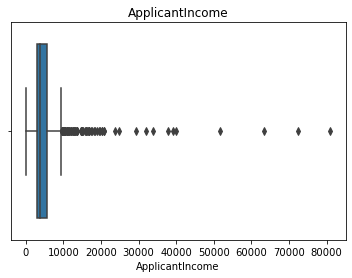

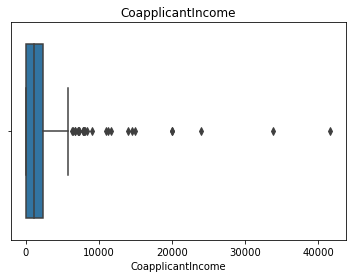

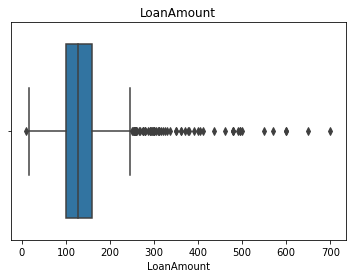

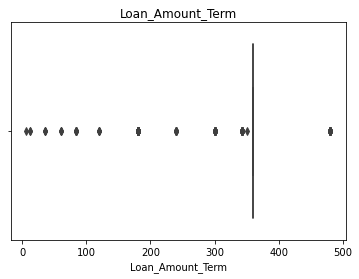

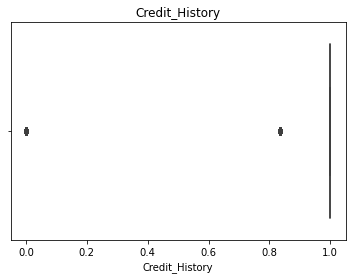

In [24]:
#for visualizing boxplot use seaborn
for x in numcols:
    sns.boxplot(combined_dataset[x],orient='h')
    plt.title(x)
    plt.show()

In [25]:
for x in numcols:
    print(x)
    descr = combined_dataset[x].describe()
    IQR = descr['75%'] - descr['25%']
    upper_limit =  descr['75%'] + 1.5 * IQR
    lower_limit =  descr['25%'] - 1.5 * IQR  
    #outlier replacement
    combined_dataset[x][combined_dataset[x]>upper_limit] = upper_limit
    combined_dataset[x][combined_dataset[x]<lower_limit] = lower_limit

ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History


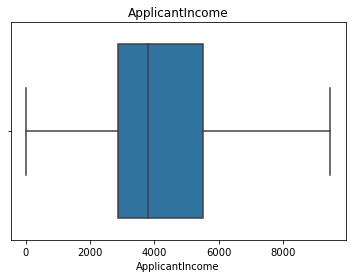

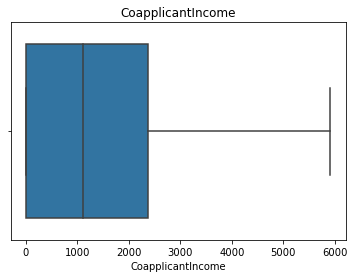

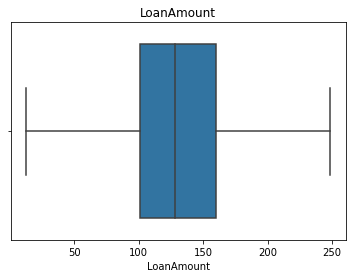

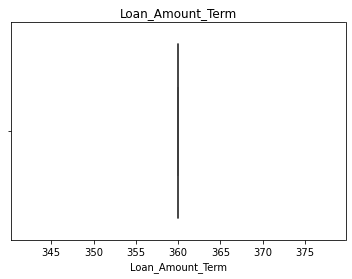

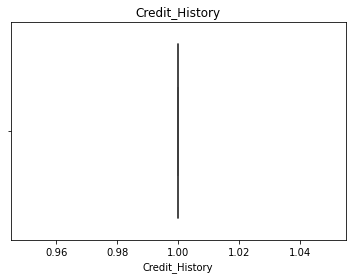

In [26]:
for x in numcols:
    sns.boxplot(combined_dataset[x],orient='h')
    plt.title(x)
    plt.show()

In [27]:
#LAbel encoding
combined_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [28]:
combined_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,type
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,142.51153,360.0,1.0,Urban,1,train
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.00000,360.0,1.0,Rural,0,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.00000,360.0,1.0,Urban,1,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.00000,360.0,1.0,Urban,1,train
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.00000,360.0,1.0,Urban,1,train


In [29]:
combined_dataset['Dependents'].value_counts()

0     570
2     160
1     160
3+     91
Name: Dependents, dtype: int64

In [30]:
#replacing the value 3+ to 4
combined_dataset=combined_dataset.replace(to_replace='3+',value=4)

In [31]:
combined_dataset['Dependents'].value_counts()

0    570
2    160
1    160
4     91
Name: Dependents, dtype: int64

In [32]:
#convert categorical column to numerical values
combined_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':0,'Female':1}},inplace=True)

In [33]:
combined_dataset['Property_Area'].value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [34]:
combined_dataset.replace({'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

In [35]:
combined_dataset['Property_Area'].value_counts()

1    349
2    342
0    290
Name: Property_Area, dtype: int64

In [36]:
combined_dataset.replace({'Education':{'Graduate':0,'Not Graduate':1}},inplace=True)

In [37]:
# convertind the Dependents column
Dependents_ = pd.to_numeric(combined_dataset.Dependents)

# dropping the previous Dependents column
combined_dataset.drop(['Dependents'], axis = 1, inplace = True)

# concatination of the new Dependents column with both datasets
combined_dataset = pd.concat([combined_dataset, Dependents_], axis = 1)


In [38]:
combined_dataset.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,type,Dependents
0,LP001002,0,0,0,No,5849.0,0.0,142.51153,360.0,1.0,2,1,train,0
1,LP001003,0,1,0,No,4583.0,1508.0,128.00000,360.0,1.0,0,0,train,1
2,LP001005,0,1,0,Yes,3000.0,0.0,66.00000,360.0,1.0,2,1,train,0
3,LP001006,0,1,1,No,2583.0,2358.0,120.00000,360.0,1.0,2,1,train,0
4,LP001008,0,0,0,No,6000.0,0.0,141.00000,360.0,1.0,2,1,train,0


In [39]:
combined_dataset.replace({'Self_Employed':{'No':0,'Yes':1}},inplace=True)

In [40]:
trained_data=combined_dataset[combined_dataset['type']=='train']

In [41]:
trained_data.shape

(614, 14)

In [42]:
trained_data.drop('type',axis=1)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
0,LP001002,0,0,0,0,5849.0,0.0,142.51153,360.0,1.0,2,1,0
1,LP001003,0,1,0,0,4583.0,1508.0,128.00000,360.0,1.0,0,0,1
2,LP001005,0,1,0,1,3000.0,0.0,66.00000,360.0,1.0,2,1,0
3,LP001006,0,1,1,0,2583.0,2358.0,120.00000,360.0,1.0,2,1,0
4,LP001008,0,0,0,0,6000.0,0.0,141.00000,360.0,1.0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,0,2900.0,0.0,71.00000,360.0,1.0,0,1,0
610,LP002979,0,1,0,0,4106.0,0.0,40.00000,360.0,1.0,0,1,4
611,LP002983,0,1,0,0,8072.0,240.0,248.50000,360.0,1.0,2,1,1
612,LP002984,0,1,0,0,7583.0,0.0,187.00000,360.0,1.0,2,1,2


In [43]:
test_dataset=combined_dataset[combined_dataset['type']=='test']
test_dataset.drop(columns={'type','Loan_ID'},axis=1,inplace=True)

In [44]:
test_dataset.shape

(367, 12)

In [45]:
test_dataset=test_dataset.drop(columns=['Loan_Status'],axis=1)

In [46]:
x=trained_data.drop(columns=['Loan_ID','type','Loan_Status'],axis=1)
y=trained_data['Loan_Status']

# Modelling

In [47]:
#Logistic Regression

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)
logreg = LogisticRegression()

In [49]:
i=1
mean_score=0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = x.iloc[train_index],x.loc[test_index]
    ytr,yvl = y.iloc[train_index],y.loc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean_score=mean_score+score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test_dataset)
    pred = model.predict_proba(xvl)[:,1]



1 of kfold 5 
accuracy_score 0.6747967479674797

2 of kfold 5 
accuracy_score 0.6829268292682927

3 of kfold 5 
accuracy_score 0.6829268292682927

4 of kfold 5 
accuracy_score 0.6747967479674797

5 of kfold 5 
accuracy_score 0.6885245901639344


In [50]:
print("Mean validation acuracy :",(mean_score/5)*100)

Mean validation acuracy : 68.07943489270959


In [181]:
#Decision Tree

In [182]:
from sklearn.tree import DecisionTreeClassifier

In [183]:
i=1
mean_score=0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = x.iloc[train_index],x.loc[test_index]
    ytr,yvl = y.iloc[train_index],y.loc[test_index]
    model = DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean_score=mean_score+score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test_dataset)
    pred = model.predict_proba(xvl)[:,1]



1 of kfold 5 
accuracy_score 0.6422764227642277

2 of kfold 5 
accuracy_score 0.5040650406504065

3 of kfold 5 
accuracy_score 0.5934959349593496

4 of kfold 5 
accuracy_score 0.5853658536585366

5 of kfold 5 
accuracy_score 0.5573770491803278


In [184]:
print("Mean validation acuracy :",(mean_score/5)*100)

Mean validation acuracy : 57.651606024256964


In [185]:
#Random Forest

In [186]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
i=1
mean_score=0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = x.iloc[train_index],x.loc[test_index]
    ytr,yvl = y.iloc[train_index],y.loc[test_index]
    model = RandomForestClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean_score=mean_score+score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test_dataset)
    pred = model.predict_proba(xvl)[:,1]



1 of kfold 5 
accuracy_score 0.6910569105691057

2 of kfold 5 
accuracy_score 0.6504065040650406

3 of kfold 5 
accuracy_score 0.6422764227642277

4 of kfold 5 
accuracy_score 0.6504065040650406

5 of kfold 5 
accuracy_score 0.5819672131147541


In [188]:
print("Mean validation acuracy :",(mean_score/5)*100)

Mean validation acuracy : 64.32227109156337


In [189]:
#improve the accuracy by hyperparameter tuning

In [190]:
#from sklearn.model_selection import GridSearchCV

In [191]:
#provide range for ma_depth from 1 to 20 with an 
#interval of 2 and from 1 to 200 with an interval of 20 for n_estimators

In [192]:
#param_grid= {'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}

In [193]:
#grid_search=GridSearchCV(RandomForestClassifier(random_state=1),param_grid)

In [194]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [195]:
#grid_search.fit(X_train,y_train)

In [196]:
#GridSearchCV(cv=None,error_score='raise',estimator=RandomForestClassifier(bootstrap=True,class_weight=None,criterion='gini',max_depth=None,max_features='auto',max_leaf_nodes=None,min_impurity_decrease=0.0,min_impurity_split=None,min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimators=10,n_jobs=1,oob_score=False,random_state=1,verbose=0,warm_start=False),fit_params=None,iid=True,n_jobs=1,param_grid={'max_depth':[1,3,5,7,9,11,13,15,17,19],'n_estimators'=[1,21,41,61,81,101,121,141,161,181]},pre_dispatch='2*n_jobs',refit=True,return_train_score='warn',scoring=None,verbose=0)

# XGBoost

In [197]:
from xgboost import XGBClassifier

In [198]:
i=1
mean_score=0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = x.iloc[train_index],x.loc[test_index]
    ytr,yvl = y.iloc[train_index],y.loc[test_index]
    model = XGBClassifier(n_estimators=50,max_depth=4)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean_score=mean_score+score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test_dataset)
    pred = model.predict_proba(xvl)[:,1]



1 of kfold 5 
[19:04:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7317073170731707

2 of kfold 5 
[19:04:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.6422764227642277

3 of kfold 5 
[19:04:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.6422764227642277

4 of kfold 5 
[19:04:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default

In [199]:
print("Mean validation acuracy :",(mean_score/5)*100)

Mean validation acuracy : 64.48487271757963


In [200]:
from sklearn.metrics import classification_report, confusion_matrix

